# Phase 1: Data Preparation

Explore and Understand the Dataset:

In [11]:
import pandas as pd
import numpy as np

# Load the dataset
churn_data = pd.read_csv('C:/Users/NayeemIslam/Downloads/project_datasets/customer_churn/churn.csv')

# Display basic information about the dataset
print(churn_data.head())
print(churn_data.describe())


  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.

In [12]:
print(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [13]:
# Get the list of column names
column_names = churn_data.columns.tolist()

# Print the list of column names
print(column_names)


['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [14]:
# Step 2: Check for Missing Values
missing_values = churn_data.isnull().sum()
print(missing_values)



State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64


In [15]:
# Step 3: Descriptive Statistics
descriptive_stats = churn_data.describe()
print(descriptive_stats)


       Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.57

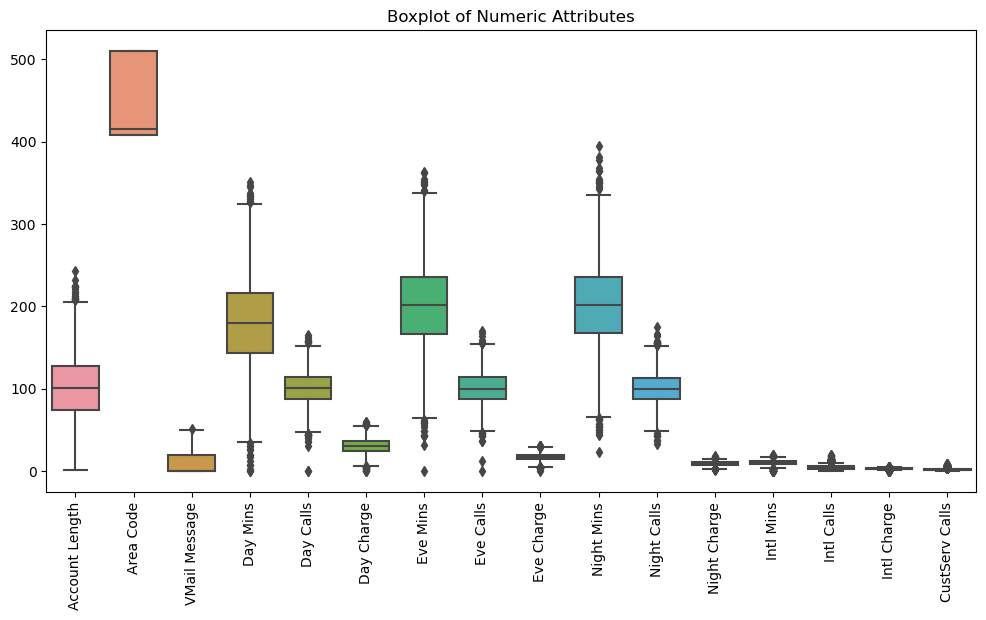

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Outliers
numeric_attributes = churn_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_attributes)
plt.title("Boxplot of Numeric Attributes")
plt.xticks(rotation=90)
plt.show()

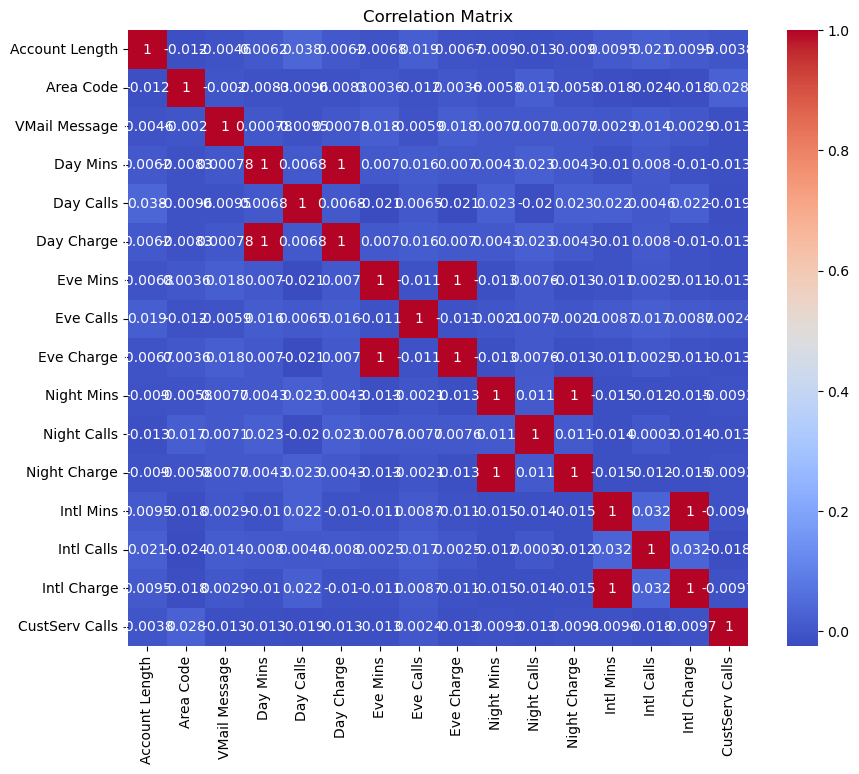

In [18]:
# Step 5: Attribute Correlation
correlation_matrix = numeric_attributes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [22]:
# Step 6: Data Balancing
churn_counts = churn_data['Churn?'].value_counts()
print(churn_counts)

False.    2850
True.      483
Name: Churn?, dtype: int64


<Figure size 1200x800 with 0 Axes>

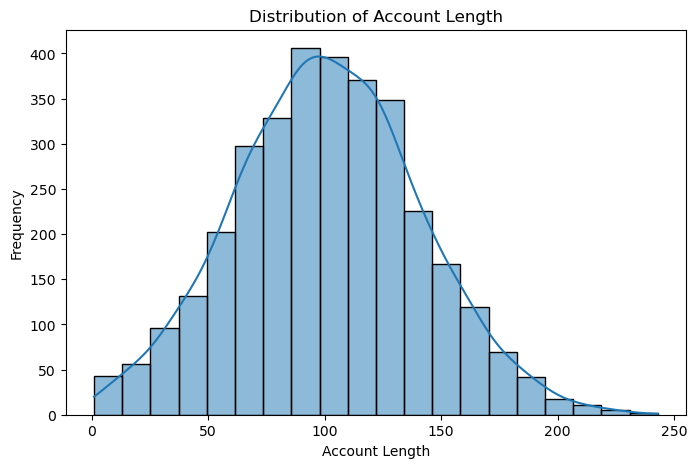

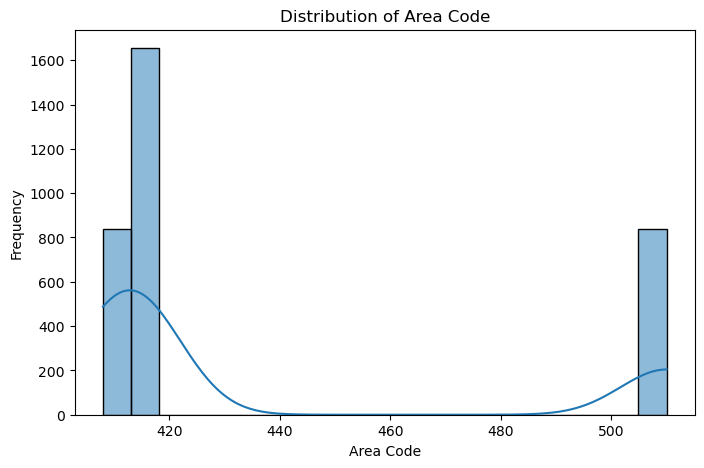

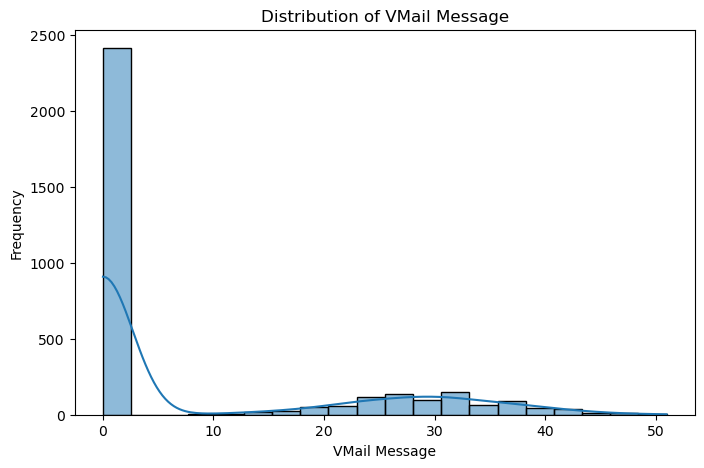

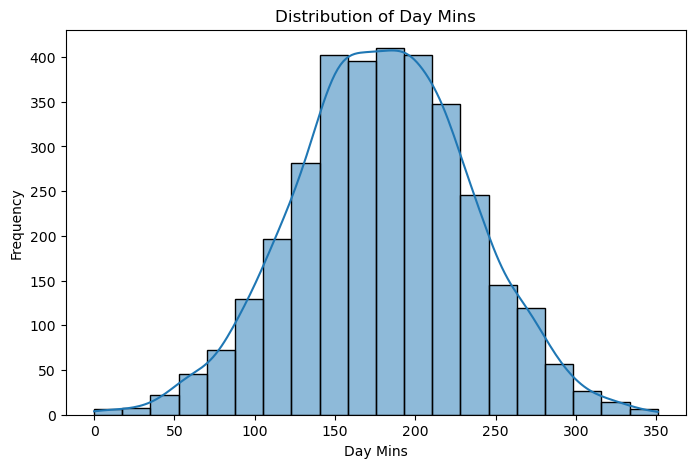

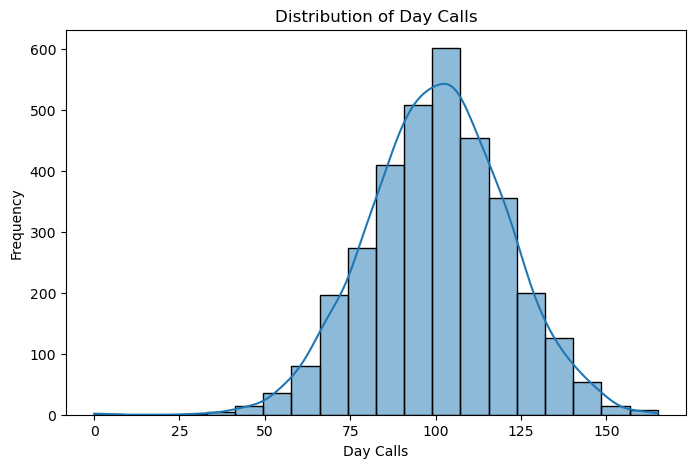

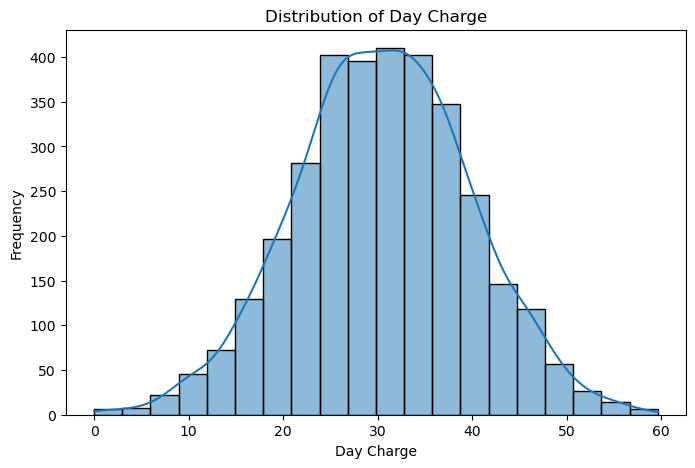

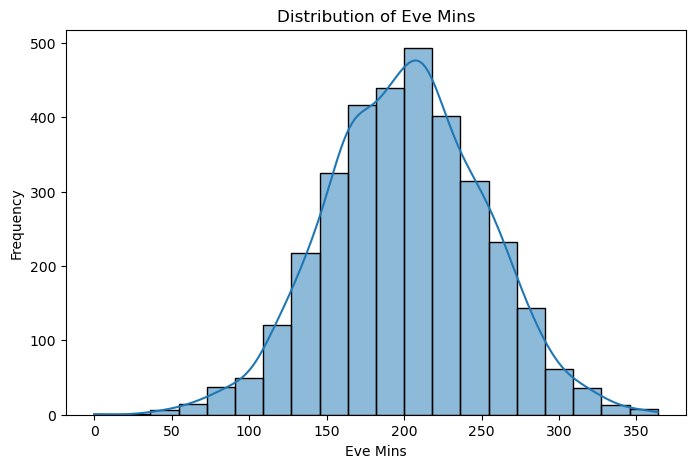

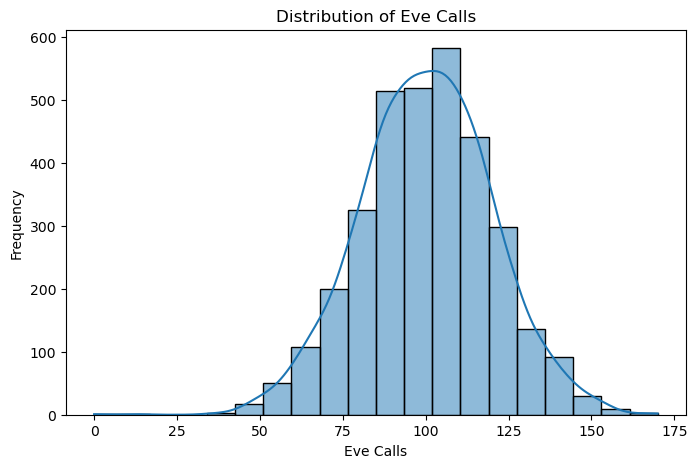

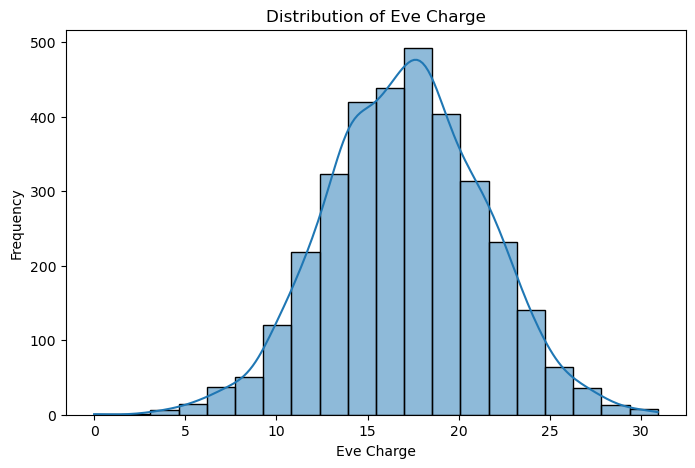

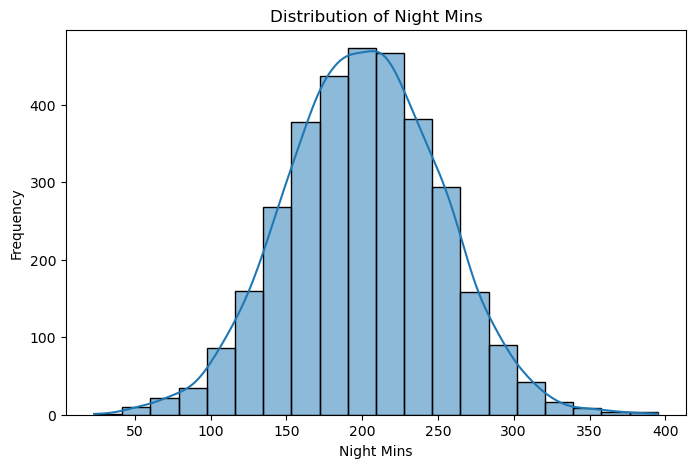

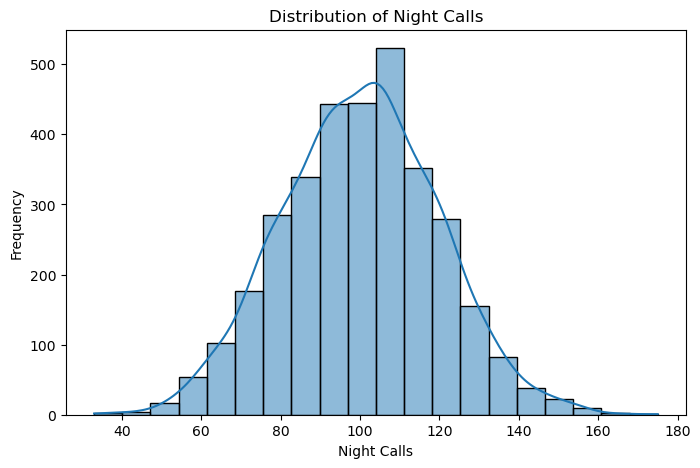

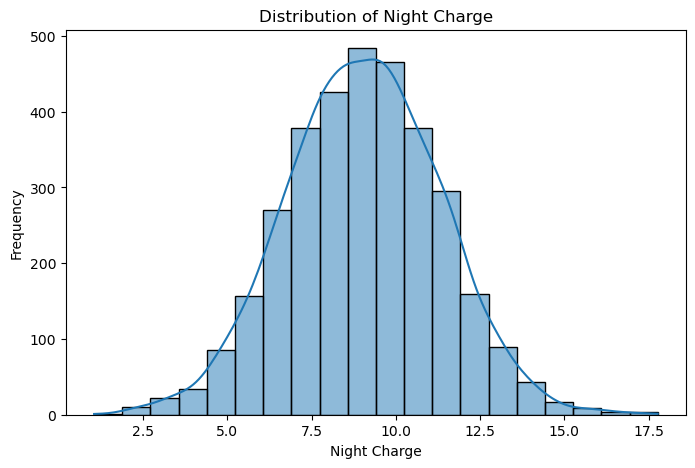

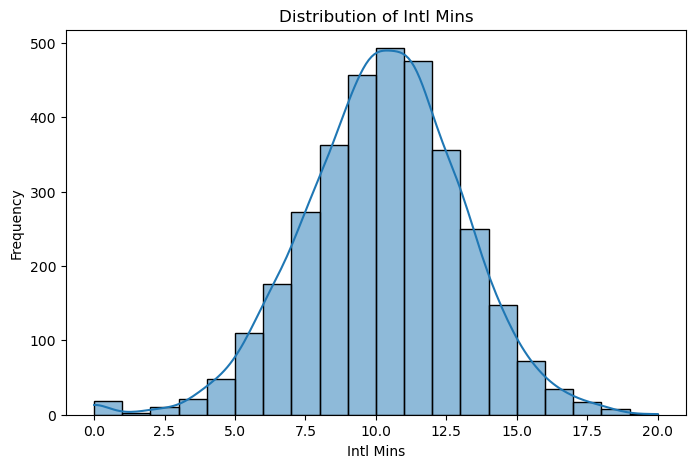

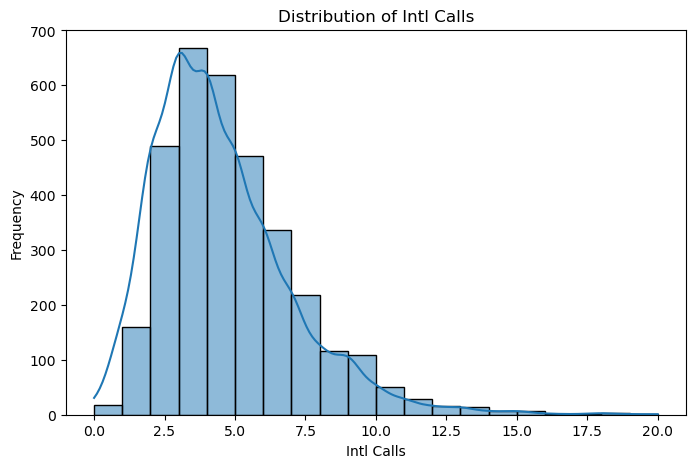

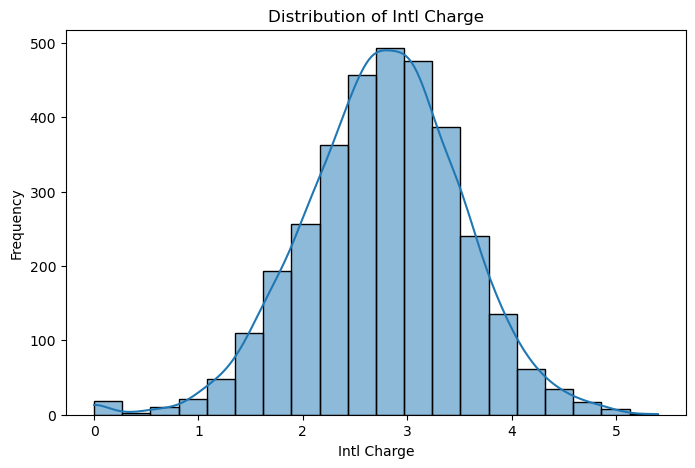

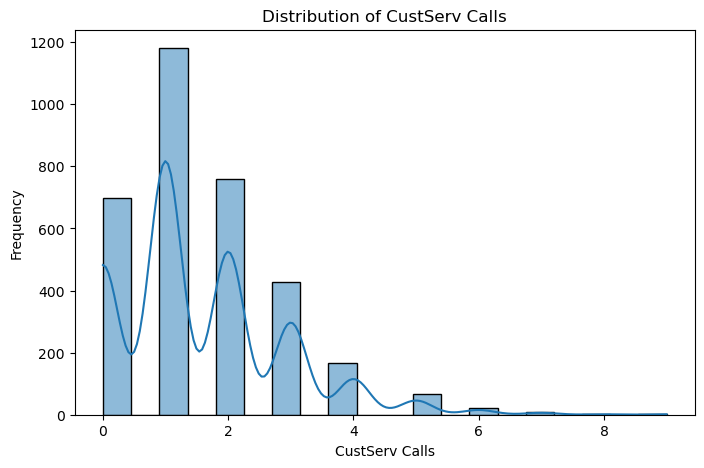

In [28]:
# Step 7: Numeric Attribute Distribution
numeric_attributes = churn_data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
for column in numeric_attributes.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=numeric_attributes, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [29]:
# Step 8: Feature Selection
selected_features = ['Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins']
churn_data_selected = churn_data[selected_features + ['Churn?']]
churn_data_selected

,Day Mins,Eve Mins,Night Mins,Intl Mins,Churn?
0,265.1,197.4,244.7,10.0,False.
1,161.6,195.5,254.4,13.7,False.
2,243.4,121.2,162.6,12.2,False.
3,299.4,61.9,196.9,6.6,False.
4,166.7,148.3,186.9,10.1,False.
...,...,...,...,...,...
3328,156.2,215.5,279.1,9.9,False.
3329,231.1,153.4,191.3,9.6,False.
3330,180.8,288.8,191.9,14.1,False.
3331,213.8,159.6,139.2,5.0,False.


# Phase 2: Predictive Modeling (Classification)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features (X) and target (y)
X = churn_data_selected.drop('Churn?', axis=1)
y = churn_data_selected['Churn?']


In [31]:

# Step 1: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [32]:
# Step 2: Decision Tree Classification
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)



In [33]:
# Step 3: Naive Bayes Classification
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)



In [34]:
# Step 4: Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    
    print(f"*** {model_name} ***")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(report)

evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_naive_bayes, "Naive Bayes")


*** Decision Tree ***
Accuracy: 0.79
Confusion Matrix:
[[722 135]
 [ 79  64]]
Classification Report:
              precision    recall  f1-score   support

      False.       0.90      0.84      0.87       857
       True.       0.32      0.45      0.37       143

    accuracy                           0.79      1000
   macro avg       0.61      0.65      0.62      1000
weighted avg       0.82      0.79      0.80      1000

*** Naive Bayes ***
Accuracy: 0.87
Confusion Matrix:
[[856   1]
 [133  10]]
Classification Report:
              precision    recall  f1-score   support

      False.       0.87      1.00      0.93       857
       True.       0.91      0.07      0.13       143

    accuracy                           0.87      1000
   macro avg       0.89      0.53      0.53      1000
weighted avg       0.87      0.87      0.81      1000



# Phase 3: Comparing Classification Models

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Compare Classification Models
def compare_models(y_true, y_pred_1, y_pred_2, model1_name, model2_name):
    accuracy_1 = accuracy_score(y_true, y_pred_1)
    accuracy_2 = accuracy_score(y_true, y_pred_2)
    
    precision_1 = precision_score(y_true, y_pred_1)
    precision_2 = precision_score(y_true, y_pred_2)
    
    recall_1 = recall_score(y_true, y_pred_1)
    recall_2 = recall_score(y_true, y_pred_2)
    
    f1_1 = f1_score(y_true, y_pred_1)
    f1_2 = f1_score(y_true, y_pred_2)
    
    print("Comparison of Classification Models:")
    print(f"Model: {model1_name}\nAccuracy: {accuracy_1:.2f}, Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1-Score: {f1_1:.2f}")
    print(f"Model: {model2_name}\nAccuracy: {accuracy_2:.2f}, Precision: {precision_2:.2f}, Recall: {recall_2:.2f}, F1-Score: {f1_2:.2f}")



In [39]:
# Convert labels to boolean
y_test_bool = y_test == 'True.'
y_pred_decision_tree_bool = y_pred_decision_tree == 'True.'
y_pred_naive_bayes_bool = y_pred_naive_bayes == 'True.'

# Step 2: Compare Decision Tree and Naive Bayes
compare_models(y_test_bool, y_pred_decision_tree_bool, y_pred_naive_bayes_bool, "Decision Tree", "Naive Bayes")


Comparison of Classification Models:
Model: Decision Tree
Accuracy: 0.79, Precision: 0.32, Recall: 0.45, F1-Score: 0.37
Model: Naive Bayes
Accuracy: 0.87, Precision: 0.91, Recall: 0.07, F1-Score: 0.13


# Phase 4: Conclusions and Recommendations

In [40]:
# Step 1: Conclusion and Recommendations
def conclude_recommend(y_true, y_pred_decision_tree, y_pred_naive_bayes):
    print("Phase 4: Conclusion and Recommendations\n")
    
    # Compare the results of Decision Tree and Naive Bayes
    if sum(y_pred_decision_tree) > sum(y_pred_naive_bayes):
        better_model = "Decision Tree"
        better_precision = precision_score(y_true, y_pred_decision_tree)
        better_recall = recall_score(y_true, y_pred_decision_tree)
    else:
        better_model = "Naive Bayes"
        better_precision = precision_score(y_true, y_pred_naive_bayes)
        better_recall = recall_score(y_true, y_pred_naive_bayes)
    
    print("Based on the comparison of classification models:")
    print(f"The {better_model} model has better precision ({better_precision:.2f}) and recall ({better_recall:.2f}).")
    
    print("\nRecommendations:")
    if better_model == "Decision Tree":
        print("1. Focus on improving the precision and recall of the Decision Tree model.")
        print("2. Investigate features that contribute to false positives and false negatives.")
    else:
        print("1. The Naive Bayes model has higher precision but lower recall.")
        print("2. Consider the trade-off between precision and recall based on business objectives.")
    
    print("\nConclusions:")
    print("1. Both models have strengths and weaknesses in terms of precision and recall.")
    print("2. The choice of model should be based on the organization's priorities and requirements.")
    print("3. Further analysis and feature engineering may help improve the performance of both models.")
    
# Step 2: Conclude and recommend
conclude_recommend(y_test_bool, y_pred_decision_tree_bool, y_pred_naive_bayes_bool)


Phase 4: Conclusion and Recommendations

Based on the comparison of classification models:
The Decision Tree model has better precision (0.32) and recall (0.45).

Recommendations:
1. Focus on improving the precision and recall of the Decision Tree model.
2. Investigate features that contribute to false positives and false negatives.

Conclusions:
1. Both models have strengths and weaknesses in terms of precision and recall.
2. The choice of model should be based on the organization's priorities and requirements.
3. Further analysis and feature engineering may help improve the performance of both models.
